In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./ds_salaries.csv')
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
data['experience_level'] = data['experience_level'] \
    .astype('category') \
    .cat \
    .set_categories(['EN', 'MI', 'SE', 'EX'], ordered=True)

In [4]:
salaries_usd=data['salary_in_usd'].copy()
salaries_usd

0        85847
1        30000
2        25500
3       175000
4       120000
         ...  
3750    412000
3751    151000
3752    105000
3753    100000
3754     94665
Name: salary_in_usd, Length: 3755, dtype: int64

In [5]:
data_to_process=data
data_to_process

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [6]:
data_of_interest=data_to_process.drop(columns=['salary','salary_currency']).copy()
data_of_interest

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


# work_year

<Axes: >

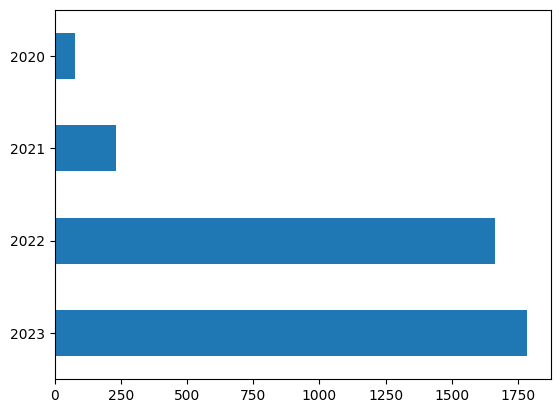

In [7]:
data_of_interest['work_year'].value_counts().plot.barh()

In [8]:
data_of_interest[data_of_interest["work_year"]==2020]["salary_in_usd"].median()

73065.0

In [9]:
data_of_interest[data_of_interest["work_year"]==2021]["salary_in_usd"].median()

80000.0

In [10]:
data_of_interest[data_of_interest["work_year"]==2022]["salary_in_usd"].median()

131300.0

In [11]:
data_of_interest[data_of_interest["work_year"]==2023]["salary_in_usd"].median()

143860.0

In [12]:
mediana_salarial=[]

for i in [2020,2021,2022, 2023]:
    mediana_salarial.append(data_of_interest[data_of_interest["work_year"]==i]["salary_in_usd"].median())
mediana_salarial

[73065.0, 80000.0, 131300.0, 143860.0]

In [13]:
anos=['2020','2021','2022', '2023']
anos

['2020', '2021', '2022', '2023']

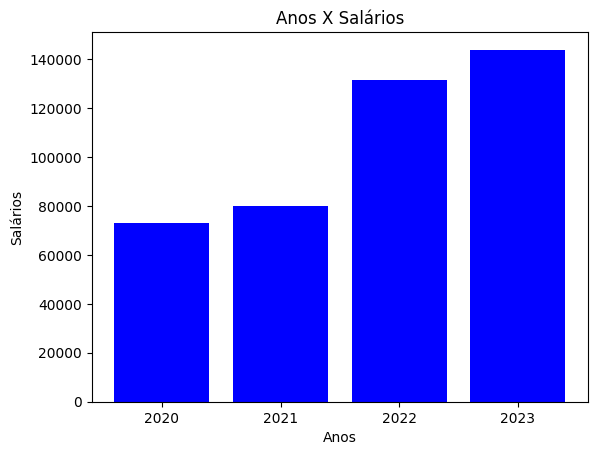

In [14]:
plt.bar(anos,mediana_salarial, color='blue')
plt.title('Anos X Salários')
plt.xlabel('Anos')
plt.ylabel('Salários')
plt.show()

In [15]:
porcentagem_aumento_2020_2021=(mediana_salarial[1]-mediana_salarial[0])/mediana_salarial[0]
porcentagem_aumento_2020_2021

0.09491548621090809

# experience_level

In [16]:
data_of_interest['log_salary'] = np.log10(data_of_interest['salary_in_usd'])

<Axes: >

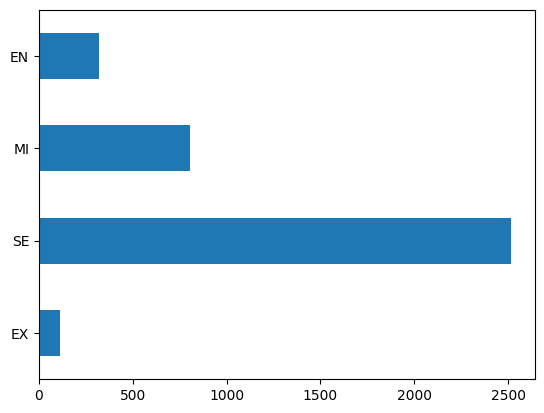

In [17]:
data_of_interest['experience_level'].value_counts().sort_index(ascending=False).plot(kind='barh')

In [18]:
mediana_salarial_experiencia=[]
experiencia=["EN","MI","SE","EX"]

for i in experiencia:
    mediana_salarial_experiencia.append(data_of_interest[data_of_interest["experience_level"]==i]["salary_in_usd"].median())
mediana_salarial_experiencia

[70000.0, 100000.0, 146000.0, 196000.0]

In [19]:
data_of_interest['experience_level'].value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [ ]:
plt.bar(experiencia,mediana_salarial_experiencia, color='blue')
plt.title('Experiência X Salários')
plt.xlabel('Experiência')
plt.ylabel('Salários')
plt.show()

In [ ]:
data_of_interest[['salary_in_usd', 'experience_level']].plot.box(by='experience_level');

In [ ]:
data_of_interest[['log_salary', 'experience_level']].plot.box(by='experience_level');

# Employment Type

In [ ]:
data_of_interest['employment_type'].value_counts()

In [ ]:
data_of_interest['employment_type'].value_counts().FT/data_of_interest['employment_type'].value_counts().sum()*100

In [ ]:
mediana_salarial_ET=[]
employment_type=["CT", "FT", "FL", "PT"]

for i in employment_type:
    mediana_salarial_ET.append(data_of_interest[data_of_interest["employment_type"]==i]["salary_in_usd"].median())
plt.bar(employment_type,mediana_salarial_ET, color='blue')
plt.title('Employment Type X Salários')
plt.xlabel('Employment Type')
plt.ylabel('Salários')
plt.show()

In [ ]:
data_of_interest[['salary_in_usd', 'employment_type']].plot.box(by='employment_type');

# job_title

In [ ]:
data_of_interest['job_title'].describe()

# company_location

In [ ]:
plt.figure(figsize=(8, 20))
data_of_interest['company_location'].value_counts().plot.barh()


In [ ]:


data_of_interest['company_location'].value_counts().US/data_of_interest['company_location'].value_counts().sum()*100

In [ ]:
data_of_interest = data_of_interest[data_of_interest['company_location'] == "US"]
data_of_interest['company_location']

In [ ]:
data_of_interest['employee_residence'].value_counts().plot.barh()

In [ ]:
data_of_interest['employee_residence'].value_counts().US/data_of_interest['employee_residence'].value_counts().sum()*100

In [ ]:
data_of_interest = data_of_interest[data_of_interest['employee_residence'] == "US"]
data_of_interest['employee_residence'].value_counts().plot.barh()

In [ ]:
data_of_interest = data_of_interest.drop(columns=['employee_residence', 'company_location'])

# remote_ratio

In [ ]:
data_of_interest['remote_ratio'].value_counts().sort_index().plot.barh()

In [ ]:
data_of_interest['remote_ratio'].value_counts()

In [ ]:
data_of_interest = data_of_interest[data_of_interest['remote_ratio'] != 50]
data_of_interest['remote_ratio'].value_counts().sort_index().plot.barh()

In [ ]:
data_of_interest[['salary_in_usd', 'remote_ratio']].plot.box(by='remote_ratio');

In [ ]:
data_of_interest = data_of_interest.drop(columns=["remote_ratio"])

# company_size

In [ ]:
data_of_interest['company_size'].value_counts().sort_index().plot.barh()

In [ ]:
data_of_interest['company_size'].value_counts().S/data_of_interest['company_size'].value_counts().sum()*100

In [ ]:
data_of_interest = data_of_interest[data_of_interest['company_size'] != "S"]
data_of_interest['company_size'].value_counts().sort_index().plot.barh()

In [ ]:
data_of_interest[['salary_in_usd', 'company_size']].plot.box(by='company_size');

# salary

In [ ]:
data_of_interest['salary_in_usd'].plot.hist()

In [ ]:
data_of_interest['log_salary'] = np.log10(data_of_interest['salary_in_usd'])

In [ ]:
data_of_interest['log_salary'].plot.hist()

In [ ]:
data_of_interest[['log_salary', 'experience_level']].plot.box(by='experience_level');

In [ ]:
data['job_title'].nunique()


In [ ]:
data['job_title'].unique()


data.loc[data['job_title'].str.contains('Data Scientist', case=False), 'job_title'] = 'Data Scientist'


data.loc[data['job_title'].str.contains('Data Engineer', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Data Analyst', case=False), 'job_title'] = 'Data Analyst'


data.loc[data['job_title'].str.contains('Data Analytics', case=False), 'job_title'] = 'Data Analyst'


data.loc[data['job_title'].str.contains('Data Architect', case=False), 'job_title'] = 'Data Architect'

data.loc[data['job_title'].str.contains('Data Science', case=False), 'job_title'] = 'Data Scientist'


data.loc[data['job_title'].str.contains('Machine Learning Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'

data.loc[data['job_title'].str.contains('Computer Vision', case=False), 'job_title'] = 'Machine Learning Engineer'

data.loc[data['job_title'].str.contains('ML Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'

data.loc[data['job_title'].str.contains('AI Scientist', case=False), 'job_title'] = 'AI Scientist'


data.loc[data['job_title'].str.contains('Machine Learning Developer', case=False), 'job_title'] = 'AI Developer'


data.loc[data['job_title'].str.contains('Power BI Developer', case=False), 'job_title'] = 'BI Developer'


data.loc[data['job_title'].str.contains('Machine Learning Software Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


data.loc[data['job_title'].str.contains('Machine Learning Research Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


data.loc[data['job_title'].str.contains('Deep Learning Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


data.loc[data['job_title'].str.contains('Deep Learning Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


data.loc[data['job_title'].str.contains('Data Operations Engineer', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Data DevOps Engineer', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Data Quality Analyst', case=False), 'job_title'] = 'Data Analyst'

data.loc[data['job_title'].str.contains('BI Analyst', case=False), 'job_title'] = 'Data Analyst'


data.loc[data['job_title'].str.contains('Insight Analyst', case=False), 'job_title'] = 'Data Analyst'


data.loc[data['job_title'].str.contains('Data Operations Analyst', case=False), 'job_title'] = 'Data Analyst'


data.loc[data['job_title'].str.contains('Applied Machine Learning Scientist', case=False), 'job_title'] = 'Machine Learning Scientist'


data.loc[data['job_title'].str.contains('Machine Learning Researcher', case=False), 'job_title'] = 'Machine Learning Scientist'


data.loc[data['job_title'].str.contains('Machine Learning Infrastructure Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


data.loc[data['job_title'].str.contains('Data Modeler', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Data Architect', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Data Infrastructure Engineer', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Cloud Database Engineer', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Applied Scientist', case=False), 'job_title'] = 'Data Scientist'

data.loc[data['job_title'].str.contains('BI', case=False), 'job_title'] = 'Business Intelligence'


data.loc[data['job_title'].str.contains('Business Intelligence', case=False), 'job_title'] = 'Business Intelligence'


data.loc[data['job_title'].str.contains('Deep Learning Researcher', case=False), 'job_title'] = 'Machine Learning Scientist'


data.loc[data['job_title'].str.contains('AI Programmer', case=False), 'job_title'] = 'AI Developer'


data.loc[data['job_title'].str.contains('NLP Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


data.loc[data['job_title'].str.contains('Data Management Specialist', case=False), 'job_title'] = 'Data Specialist'

data.loc[data['job_title'].str.contains('Data Manager', case=False), 'job_title'] = 'Manager Data'

data.loc[data['job_title'].str.contains('Head of Data', case=False), 'job_title'] = 'Manager Data'

data.loc[data['job_title'].str.contains('Data Lead', case=False), 'job_title'] = 'Manager Data'

data.loc[data['job_title'].str.contains('Manager Data Management', case=False), 'job_title'] = 'Manager Data'

data.loc[data['job_title'].str.contains('Machine Learning Manager', case=False), 'job_title'] = 'Manager Machine Learning'

data.loc[data['job_title'].str.contains('Head of Machine Learning', case=False), 'job_title'] = 'Manager Machine Learning'
data.loc[data['job_title'].str.contains('AI Scientist', case=False), 'job_title'] = 'Machine Learning Scientist'
data = data.drop(data_to_process[data_to_process.job_title == "Autonomous Vehicle Technician"].index)


In [ ]:
data['job_title'].nunique()


In [ ]:
data["job_title"].value_counts()

Decisão: eliminar job_titles de AI Developer para baixo

In [ ]:
count = data_of_interest['job_title'].value_counts()

filtered = count[count > 20]
filtered.nunique()

In [ ]:
data_of_interest = data_of_interest.loc[data_of_interest['job_title'].isin(filtered.index), :]
data_of_interest['job_title'].value_counts().plot.barh()

# salary

In [ ]:
data_of_interest

In [ ]:
#data_of_interest = data_of_interest.drop(columns=['work_year', 'remote_ratio'])

In [ ]:
data_of_interest = data_of_interest[data_of_interest['employment_type'] == "FT"]
data_of_interest = data_of_interest.drop(columns=["employment_type"])

In [ ]:
for c in data_of_interest.columns:
    print(c)

In [ ]:
data_of_interest = pd.get_dummies(data_of_interest, drop_first=False)


In [ ]:
# data_of_interest.columns

In [ ]:
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import OneHotEncoder

# one_hot_enc = make_column_transformer(
#     (OneHotEncoder(handle_unknown = 'ignore'),
#     ["experience_level", "job_title", "company_size"]),
#     remainder='passthrough')

# dados = one_hot_enc.fit_transform(data_of_interest)
# dados = pd.DataFrame(dados, columns=one_hot_enc.get_feature_names_out())
# data_of_interest=dados

In [ ]:
for c in data_of_interest.columns:
    print(c)

# modelo

In [ ]:
y = data_of_interest['log_salary'].copy()
X = data_of_interest.drop(columns=['salary_in_usd', 'log_salary']).copy()
X = X.astype('float')

In [ ]:
# y = data_of_interest['remainder__log_salary'].copy()
# X = data_of_interest.drop(columns=['remainder__salary_in_usd', 'remainder__log_salary']).copy()
# X = X.astype('float')

In [ ]:
X.shape, y.shape

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
X_train_valid, X_test_valid, y_train_valid, y_test_valid = train_test_split(X_train, y_train, test_size=0.33)

# modelo 1: Ridge

In [ ]:
import math
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

model = Ridge(alpha=1e-3)
model.fit(X_train_valid, y_train_valid)

y_pred = model.predict(X_test_valid)
RMSE = math.sqrt(mean_squared_error(y_test_valid, y_pred))
RMSE

In [ ]:
y_pred_test = model.predict(X_test)
RMSE_test = math.sqrt(mean_squared_error(y_test, y_pred_test))
RMSE_test

In [ ]:
list(zip(X_test_valid.columns, (((10**model.coef_)-1)*100)))

In [ ]:
plt.scatter(y_test_valid, y_pred)

In [ ]:
erro = y_pred - y_test_valid

plt.scatter(y_test_valid, erro)
plt.xlabel('salario')
plt.ylabel('Erro [$]')

In [ ]:
erro_percentual = (10**erro) - 1

In [ ]:
plt.scatter(y_test_valid, erro_percentual)
plt.xlabel('salario ')
plt.ylabel('Erro [%]')

In [ ]:
model.coef_

In [ ]:
pd.Series(model.coef_, index = X_test.columns)

# modelo polinomial de grau 2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=2, include_bias=False)
X_train_valid_transf = transformer.fit_transform(X_train_valid)

In [ ]:
feat_names = transformer.get_feature_names_out()

In [ ]:
X_train_valid_transf.shape

In [ ]:
from sklearn.linear_model import Ridge
alpha = 1e-3
model = Ridge(alpha=alpha)

model.fit(X_train_valid_transf, y_train_valid)

In [ ]:
list(zip(feat_names, ((10**model.coef_) - 1)*100))

In [ ]:
X_test_valid_transf = transformer.transform(X_test_valid)
y_pred = model.predict(X_test_valid_transf)

In [ ]:
RMSE = math.sqrt(mean_squared_error(y_test_valid, y_pred))
RMSE

In [ ]:
aux = y_pred - y_test_valid
aux[aux > 1e6]

In [ ]:
plt.scatter(y_test_valid, y_pred, alpha=0.3)

In [ ]:
erro = y_pred - y_test_valid

plt.scatter(y_test_valid, erro)
plt.xlabel('salario')
plt.ylabel('Erro [$]')

In [ ]:
erro_percentual = (10**erro) - 1

In [ ]:
plt.scatter(y_test_valid, erro_percentual)
plt.xlabel('salario')
plt.ylabel('Erro [%]')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_valid, y_train_valid)
y_pred = model.predict(X_test_valid)
RMSE = math.sqrt(mean_squared_error(y_test_valid, y_pred))
RMSE

# Regressão Linear

In [ ]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_LR = LinearRegression()
model_LR.fit(X_train_valid, y_train_valid)

y_pred_LR = model_LR.predict(X_test_valid)
RMSE_LR = math.sqrt(mean_squared_error(y_test_valid, y_pred_LR))
RMSE_LR

In [ ]:
y_pred_test_LR = model_LR.predict(X_test)
RMSE_test_LR = math.sqrt(mean_squared_error(y_test, y_pred_test_LR))
RMSE_test_LR

In [ ]:
model_LR.coef_

In [ ]:
list(zip(X_test_valid.columns, (((10**model_LR.coef_)-1)*100)))

In [ ]:
plt.scatter(y_test_valid, y_pred_LR)

In [ ]:
erro_LR = y_pred_LR - y_test_valid

plt.scatter(y_test_valid, erro_LR)
plt.xlabel('salario')
plt.ylabel('Erro [$]')

In [ ]:
erro_percentual_LR = (10**erro_LR) - 1

In [ ]:
plt.scatter(y_test_valid, erro_percentual_LR)
plt.xlabel('salario ')
plt.ylabel('Erro [%]')

In [ ]:
list(zip(X_train_valid.columns, ((10**model_LR.coef_) - 1)*100))